In [1]:
import MDAnalysis as mda
from modules.distances import *
from modules.dssp import dssp
from modules.input import res_list, show_fasta
from typing import Tuple
%reload_ext autoreload
%autoreload 2
import input

In [2]:
atomistic_system, reference_structure, energy_like_terms, is_aligned = input.read_files()
is_aligned = input.align_traj(is_aligned)

Calculating averaged structure:


  0%|          | 0/9073 [00:00<?, ?it/s]

align trajectory on the averaged one, save as S:\Work\gromacs\Cr_mutants\WT\tmp\md250ns_center_po_aligned.xtc


  0%|          | 0/9073 [00:00<?, ?it/s]

c:\Users\Clement\AppData\Local\Programs\Python\Python312\Lib\site-packages\MDAnalysis\coordinates\XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


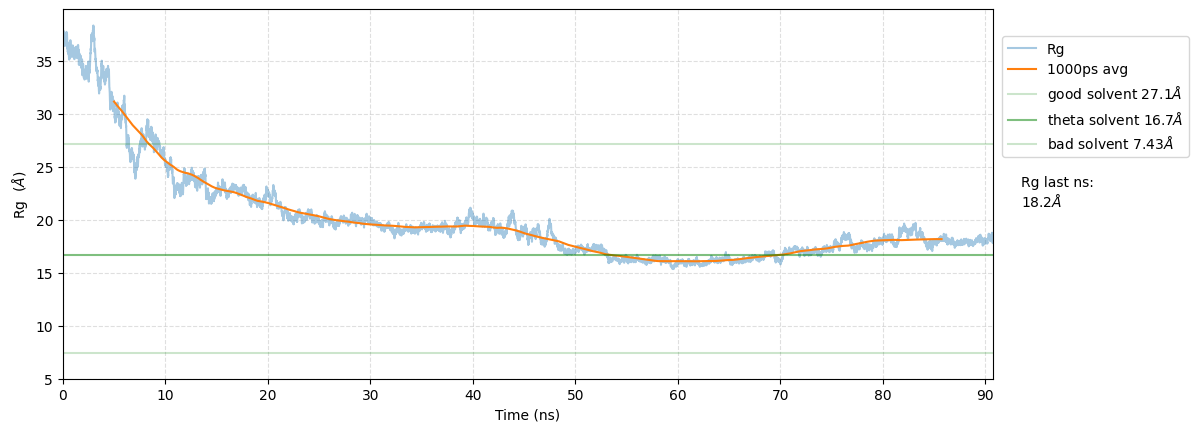

In [3]:
Rgyr = Rg(atomistic_system)

In [4]:
distances_3Darray = calculate_3D_distance(atomistic_system)

In [6]:
dist_max = 15
contact_start = 70
contact_finish = 90

atomistic_system.trajectory[0]
Rg_start = 0
rolling_rg = get_rolling_Rgs(atomistic_system, contact_start*100, contact_finish*100, residues_window=10,)

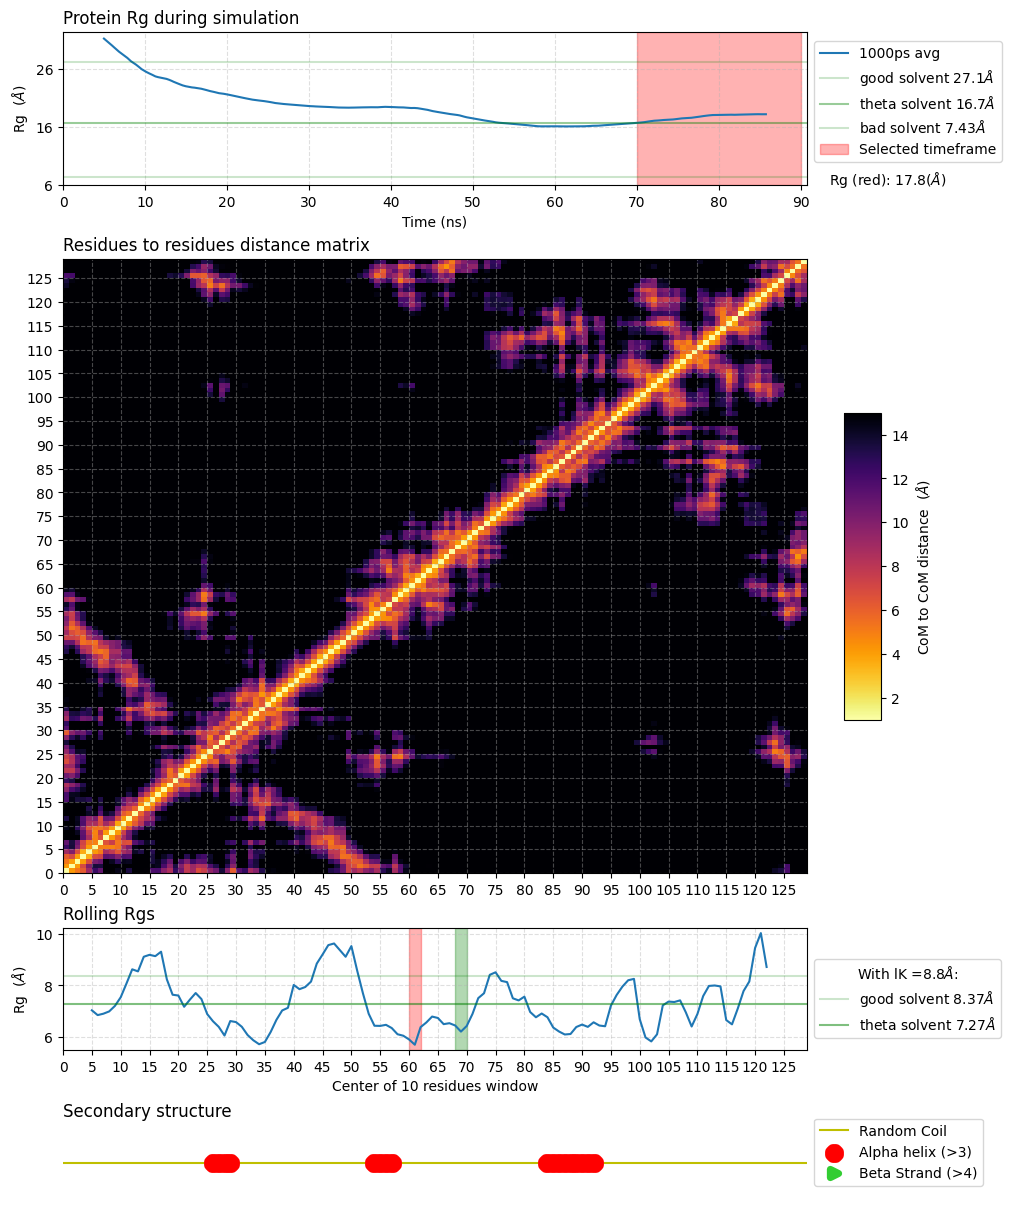

In [8]:
#atomistic_system.trajectory[0]
atomistic_system.trajectory[contact_start*100]
protein = atomistic_system.select_atoms("protein")
dsspline = dssp(protein)
fig, axes = multi_plot_distances(Rgyr,  distances_3Darray, 
                                 contact_start, contact_finish, 
                                 dist_max, dsspline, Rg_start,rolling_rg,  
                                 Khun_lengh=8.8, atomistic_system=atomistic_system)

if True: ## add selection area on the rolling RGs graph
    axes[2].axvspan(60, 62, color='red', alpha=0.3)
    axes[2].axvspan(68, 70, color='green', alpha=0.3)
    #axes[2].axvspan(46, 49, color='red', alpha=0.3)
    #axes[2].axvspan(54, 57, color='green', alpha=0.3)
    #axes[2].axvspan(55, 57, color='green', alpha=0.3)
plt.show()

In [ ]:
show_fasta(atomistic_system)

----5----10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90-
AVTPSRSALPSNWKQELESLRSSSPAPASSAPAPARSSSASWRDAAPASSAPARSSSSKKAVTPSRSALPSNWKQELESLRSSSPAPASSAP
-------------HHHHHHHHH-------------HHH--E--E-------HHHH----------------HHHHHHHHHH-----------


## Quad zoom

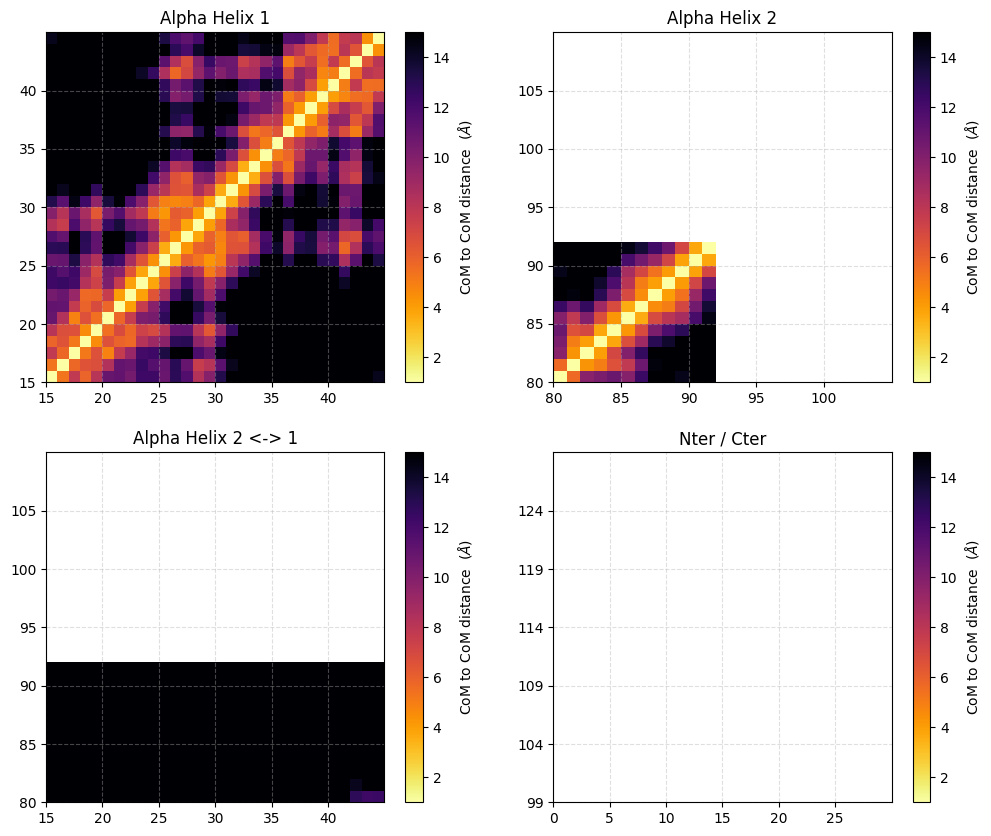

In [ ]:
fig, axs = plt.subplots(2,2)
fig.set(figheight=10, figwidth=12)
#ax = fig.add_subplot()
args = 15, fig, distances_3Darray, contact_start, contact_finish 
matrix_zoom( axs[0,0], ((15,45),(15,45)), *args)
axs[0,0].set_title("Alpha Helix 1")

matrix_zoom( axs[0,1], ((80,105),(80,110)),  *args)
axs[0,1].set_title("Alpha Helix 2")

matrix_zoom( axs[1,0], ((15,45),(80,110)), *args)
axs[1,0].set_title("Alpha Helix 2 <-> 1")

matrix_zoom( axs[1,1], ((0,30),(99,129)), *args)
axs[1,1].set_title("Nter / Cter")

plt.show()


## Single zoom

Text(0.5, 1.0, '"X" patern')

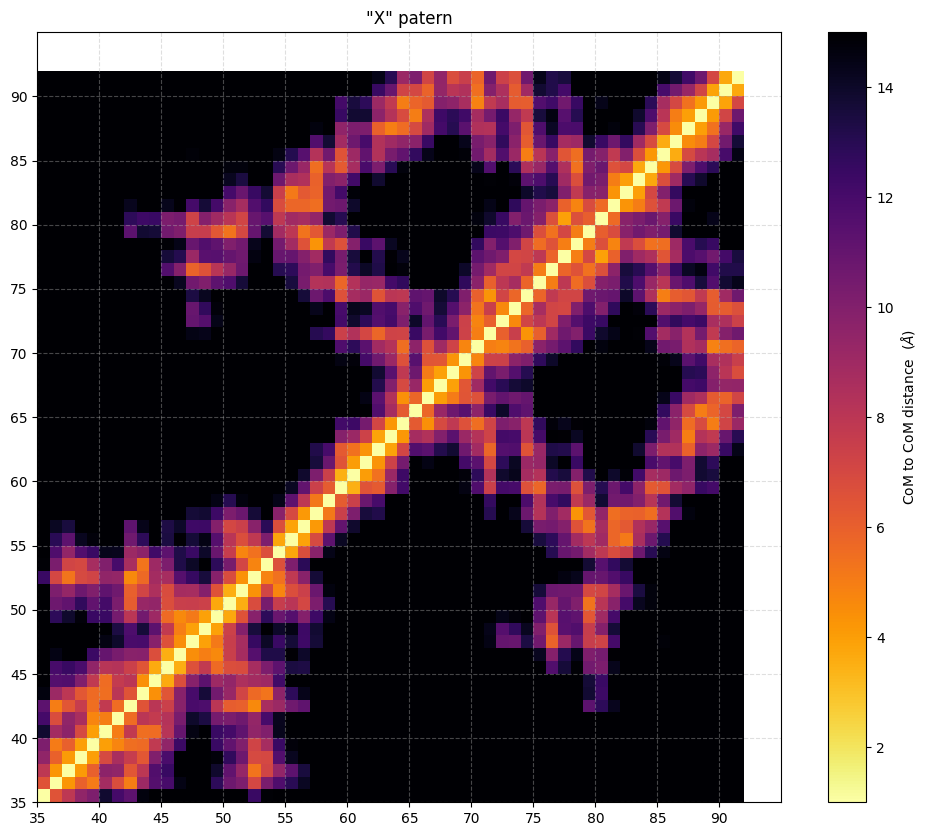

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set(figheight=10, figwidth=12)
#ax = fig.add_subplot()
args = fig, distances_3Darray, contact_start, contact_finish 
matrix_zoom( ax, ((35,95),(35,95)), 15, *args)
ax.set_title("\"X\" patern")

In [ ]:
## Extras
#plot_distances_slices(distances_3Darray, contact_start, contact_finish, dist_max)
#mean = np.mean(distances_3Darray[contact_start *100 : contact_finish *100], axis=0)
#np.savetxt(f"{sim_path}distances_avg_{contact_start}ns-{contact_finish}ns.csv", mean, delimiter="," )
cutoff = 12
#plot_every_diagonal(distances_3Darray, contact_start,contact_finish, cutoff) ## it's pretty terrible don't look at it

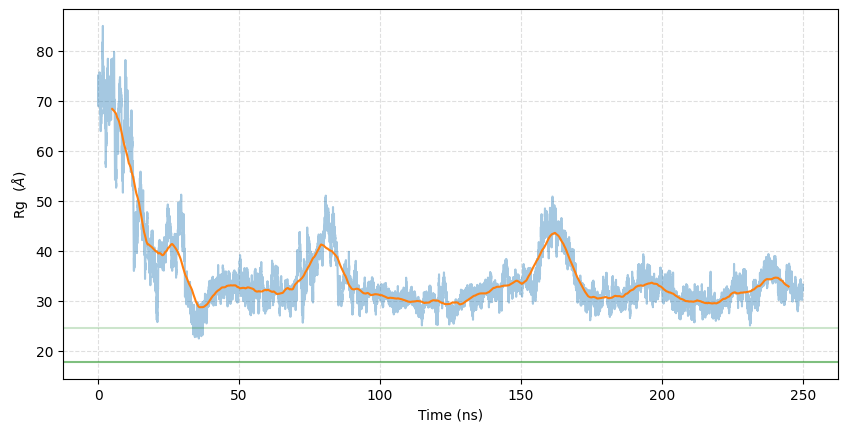

In [ ]:
seleA = "resid 28 to 34"
seleB = "resid 88 to 94"

random_walk_steps = 90-30
Khun_lengh = 8.8
sele_distance(atomistic_system, seleA, seleB, random_walk_steps, Khun_lengh)

In [ ]:
# scan window
if False:
    fig = plt.figure()
    fig.set(figwidth=10)
    ax = fig.add_subplot()
    resid = range(1,len(atomistic_system.residues),1)
    for residues_window in range(10,100,10):
        rolling_rg = get_rolling_Rgs(atomistic_system, contact_start*100, contact_finish*100, residues_window)
        ax.plot(rolling_rg[0], rolling_rg[1], label=residues_window)
    plt.legend(loc=(1.01,0))
